# Final Project Submission

Please fill out:
* Student name: Lewis Gathua Kamindu
* Student pace: Full time
* Scheduled project review date/time: 01/12/2023
* Instructor name: Lucille Kaleha
* Blog post URL: https://github.com/lewigi/Machine-Learning-Project-Vaccination-Patterns

# Predicting Vaccination Patterns: Analyzing Backgrounds, Opinions, and Behaviors in H1N1 and Seasonal Flu Vaccination Uptake

<img src="./images/flu-vaccine.jpg" alt="Flu Vaccine" width="1200" height="500">


## Overview

This work focuses on creating a machine learning project that helps stakeholders in the Public Health Sector predict vaccination patterns for the H1N1 flu and Seasonal flu.

## Background Information

In the wake of the H1N1 influenza virus pandemic that emerged in 2009, public health initiatives focused on understanding vaccination patterns among individuals became crucial. The availability of the H1N1 and seasonal flu vaccines prompted the *National 2009 H1N1 Flu Survey* in the United States. This comprehensive phone survey aimed to gather data on individuals' vaccination status against H1N1 and seasonal flu, alongside inquiries regarding their social, economic, and demographic backgrounds. Moreover, the survey delved into respondents' perspectives on the risks associated with these illnesses, their beliefs regarding vaccine effectiveness, and their behaviors concerning the mitigation of disease transmission. With a mortality toll ranging between `151,000` to `575,000` deaths globally in its initial year, the urgency to comprehend the determinants influencing vaccination decisions was paramount. Analyzing this extensive dataset provides an opportunity to uncover intricate associations between personal characteristics, beliefs, behaviors, and vaccination uptake, paving the way for informed strategies in future public health endeavors.


## Challenges

1. **Imbalanced Data:**
   - The dataset from the National 2009 H1N1 Flu Survey might exhibit imbalances in the distribution of vaccinated and non-vaccinated individuals for both H1N1 and seasonal flu. This imbalance can lead to biased model predictions and reduced accuracy.

2. **Ethical Concerns:**
   - The survey data may raise ethical concerns and handling and analyzing such health-related data may be sensitive.

## Solutions

1. **Addressing Imbalanced Data:**
   - *Resampling Techniques:* Employ techniques like oversampling (SMOTE - Synthetic Minority Over-sampling Technique) or undersampling to balance the dataset for improved model training.
   - *Algorithm Selection:* Utilize algorithms that are robust to imbalanced data, such as ensemble methods like Random Forests or boosting algorithms like XGBoost, which inherently handle class imbalances better.

2. **Diverse Representation:**
   - *Ensure diverse representation within the dataset:* A more diverse dataset can help mitigate biases and provide a more comprehensive view of different groups' experiences and behaviors.

## Problem Statement

One of the main *[Sustainable Development Goals](https://sdgs.un.org/goals)* is Good Health and Well-Being . It is therefore imperative that we use available data to give insights towards the betterment of Global Health. This projects seeks to leverage data from the National 2009 H1N1 Flu Survey to give actionable insight to relevant stakeholders in Global Health to enhance vaccination strategies, bolster disease prevention, and foster informed decision-making.

## Objectives

### General Objective

To leverage the data from the National 2009 H1N1 Flu Survey and employ machine learning methodologies to derive actionable insights that contribute to enhancing global vaccination strategies and fostering improved public health outcomes.

### Specific Objectives

1. **Identify Key Determinants:** Analyze the dataset to discern the critical socio-economic, demographic, and behavioral factors influencing individuals' decisions regarding H1N1 and seasonal flu vaccination uptake.

2. **Develop Predictive Models:** Build, tune and evaluate robust machine learning models to predict and understand the likelihood of individuals receiving the H1N1 and seasonal flu vaccines based on their backgrounds, opinions about illness risks, perceptions of vaccine effectiveness, and health behaviors.

## Data Understanding

The data has been sourced from U.S. Department of Health and Human Services (DHHS). National Center for Health Statistics. The National 2009 H1N1 Flu Survey courtesy of the United States [National Center for Health Statistics.](https://www.cdc.gov/nchs/index.htm)

The data has been divided into three excel files:

* `test_set_features.csv`: These are the features for observations that we will use to generate the predictions after training our model.

* `training_set_features.csv`: These are the input variables that our model will use to predict the probability that people received H1N1 flu and seasonal flu vaccines. There are 35 feature columns in total, each a response to a survey question. These questions cover several different topics, such as whether people observed safe behavioral practices, their opinions about the diseases and the vaccines, and their demographics.    

* `training_set_labels.csv`: These are the labels corresponding to the observations in the training features. There are two target variables: h1n1_vaccine and seasonal_vaccine. Both are binary variables, with 1 indicating that a person received the respective flu vaccine and 0 indicating that a person did not receive the respective flu vaccine.

## Loading the Data

Here we load the data and check to see some of its characteristics.

In [1]:
# Import the necessary libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix, recall_score,\
    accuracy_score, precision_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline

In [2]:
def read_preview(path):
    """
    Read data from csv file specified in file path,
    Preview first 5 rows of data
    """
    df = pd.read_csv(path, index_col='respondent_id')

    print(df.head())

    return df

In [3]:
train_features = read_preview('training_set_features.csv')

               h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
respondent_id                                                            
0                       1.0             0.0                        0.0   
1                       3.0             2.0                        0.0   
2                       1.0             1.0                        0.0   
3                       1.0             1.0                        0.0   
4                       2.0             1.0                        0.0   

               behavioral_avoidance  behavioral_face_mask  \
respondent_id                                               
0                               0.0                   0.0   
1                               1.0                   0.0   
2                               1.0                   0.0   
3                               1.0                   0.0   
4                               1.0                   0.0   

               behavioral_wash_hands  behavioral_larg

In [4]:
train_labels = read_preview('training_set_labels.csv')

               h1n1_vaccine  seasonal_vaccine
respondent_id                                
0                         0                 0
1                         0                 1
2                         0                 0
3                         0                 1
4                         0                 0


In [5]:
test_features = read_preview('test_set_features.csv')

               h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
respondent_id                                                            
26707                   2.0             2.0                        0.0   
26708                   1.0             1.0                        0.0   
26709                   2.0             2.0                        0.0   
26710                   1.0             1.0                        0.0   
26711                   3.0             1.0                        1.0   

               behavioral_avoidance  behavioral_face_mask  \
respondent_id                                               
26707                           1.0                   0.0   
26708                           0.0                   0.0   
26709                           0.0                   1.0   
26710                           0.0                   0.0   
26711                           1.0                   0.0   

               behavioral_wash_hands  behavioral_larg

In [6]:
train_features.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

## Data Exploration

We will explore the data and make use of vizualizations to see how the features interacts with the target variables and explore the distribution of target variables to check for class imbalance.

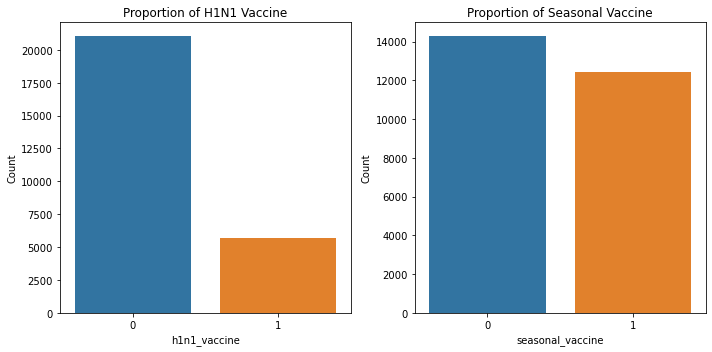

In [7]:

fig, ax = plt.subplots(1, 2, figsize=(10, 5))  # Set figsize as needed

sns.countplot(
    x='h1n1_vaccine',
    data=train_labels,
    ax=ax[0]
)
ax[0].set_title("Proportion of H1N1 Vaccine")
ax[0].set_ylabel("Count")

sns.countplot(
    x='seasonal_vaccine',
    data=train_labels,
    ax=ax[1]
)
ax[1].set_title("Proportion of Seasonal Vaccine")
ax[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

The visualization indicates a noticeable class imbalance between individuals who received the h1n1 vaccine and those who did not. To address this imbalance during modeling, resampling techniques will be essential to balance the classes. Interestingly, the count of individuals who received the seasonal flu vaccine and those who did not appears to be nearly equal. Consequently, resampling might not be necessary for the seasonal flu vaccine variable.

In [8]:
# Join the dataframes to vizualize how the features interact with the target variables.

full_dataset = train_features.join(train_labels)

full_dataset.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


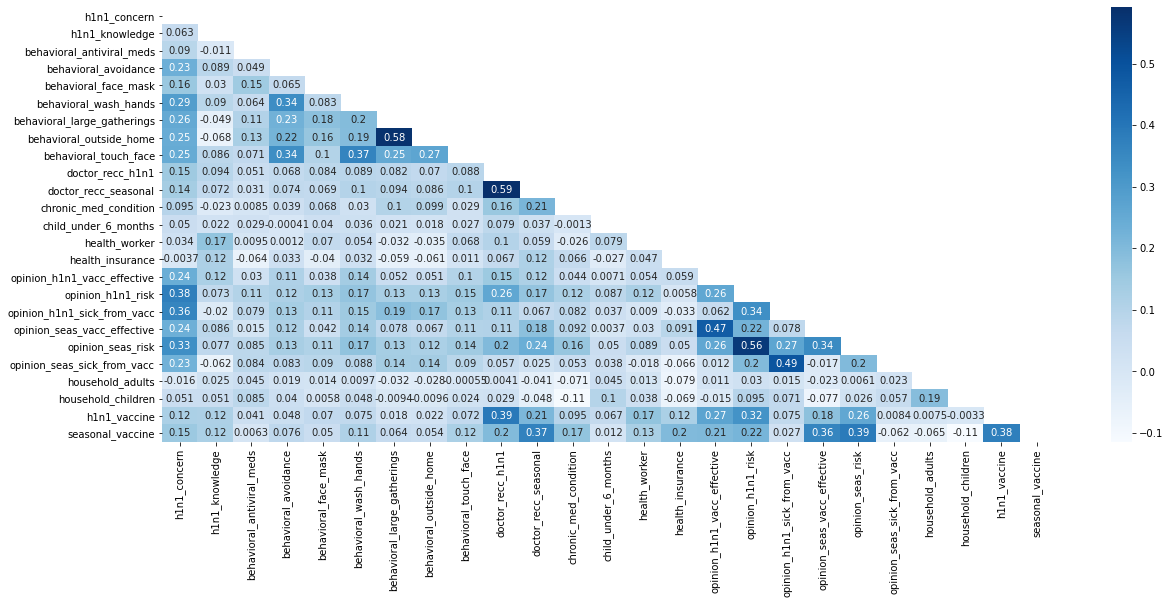

In [9]:
plt.figure(figsize=(20, 8))

mask = np.triu(full_dataset.corr())  

sns.heatmap(full_dataset.corr(), annot=True, cmap='Blues', mask=mask)

plt.show()

The heatmap reveals that certain features exhibit correlations with an individual's acquisition of either a seasonal vaccine or an H1N1 vaccine. Additionally, it highlights a slight positive correlation of `0.38` between receiving an H1N1 vaccine and obtaining a seasonal vaccine. This implies a likelihood that an individual who receives an H1N1 vaccine might also be inclined to get a seasonal flu vaccine.

In [10]:
def vaccination_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of vaccination rate for `target` against 
    `col`. 
    
    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns 
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes 
            object to attach plot to
    """
    counts = (full_dataset[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.legend().remove()

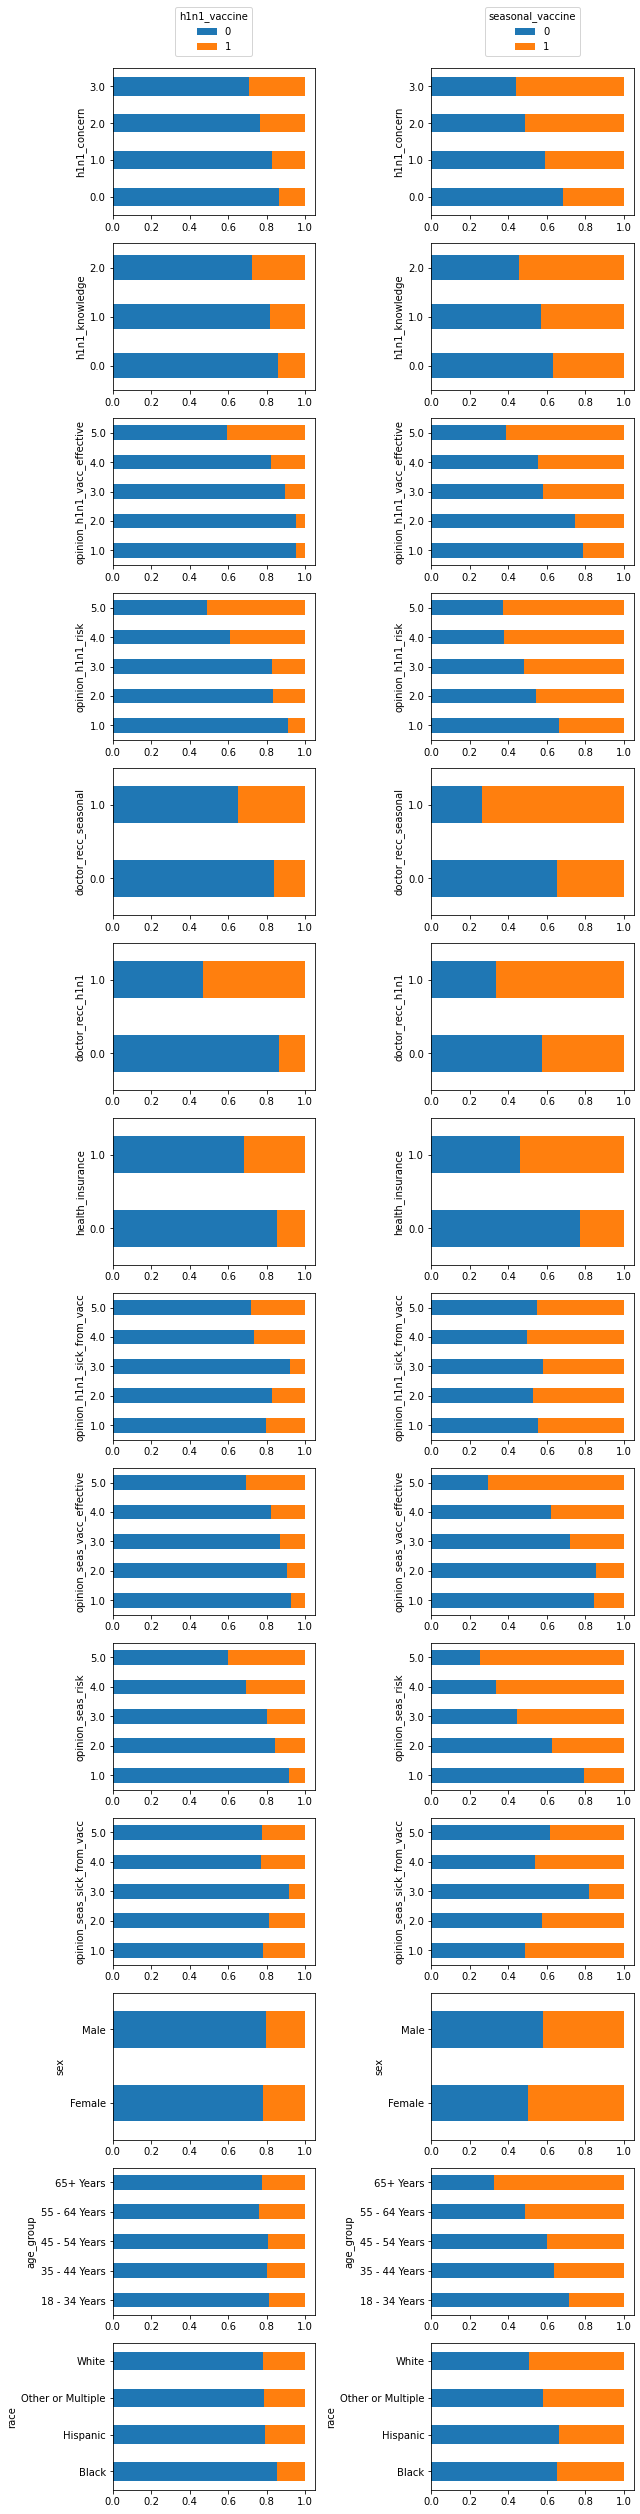

In [11]:
cols_to_plot = [
    'h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'doctor_recc_seasonal',
    'doctor_recc_h1n1',
    'health_insurance',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'sex',
    'age_group',
    'race',
]

fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(9,len(cols_to_plot)*2.5)
)
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
        col, 'h1n1_vaccine', full_dataset, ax=ax[idx, 0]
    )
    vaccination_rate_plot(
        col, 'seasonal_vaccine', full_dataset, ax=ax[idx, 1]
    )
    
ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout()

From this extensive visualization portraying the relationship between various features and our target variables, several conclusions can be drawn:

- Certain features significantly influence the probability of an individual receiving either the H1N1 vaccine or the seasonal vaccine. These influential features include concerns about the virus, knowledge level, opinions regarding vaccine effectiveness, perceptions of H1N1 or seasonal flu risks, recommendations from doctors, and whether one had health insurance.

- Conversely, some features exhibited minimal impact on the likelihood of an individual receiving either the H1N1 vaccine or the seasonal vaccine. These features encompassed race, gender, and the belief that a vaccine might induce sickness.

- Age emerged as a factor influencing the likelihood of receiving a seasonal flu vaccine but did not notably affect the uptake of the H1N1 vaccine.


## Data Preprocessing

Here we will utilize Sklearn's Pipeline method to preprocess our data. We will use SimpleImputer to handle missing values and OneHotEncoder to transform categorical data to numeric data.

In [12]:
# Define categorical columns

categorical_columns = train_features.select_dtypes(include=['object', 'category']).columns.tolist()

categorical_column_numbers = [train_features.columns.get_loc(col) for col in categorical_columns]

categorical_column_numbers

[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 33, 34]

In [13]:
# Define categorical columns

numerical_columns = train_features.select_dtypes(include=['number']).columns.tolist()

numerical_column_numbers = [train_features.columns.get_loc(col) for col in numerical_columns]

numerical_column_numbers

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 31,
 32]

In [14]:
# Generate sub-pipelines for preprocessing the numeric columns and categorical columns

num_pipe = Pipeline(steps=[('num_impute', SimpleImputer()),
                           ('ss', StandardScaler())])

cat_pipe = Pipeline(steps=[('cat_impute', SimpleImputer(strategy='constant', fill_value='missing')),
                             ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))])

In [15]:
# Define the column transformer

CT = ColumnTransformer(transformers=[('num_pipe', num_pipe, numerical_column_numbers),
                                         ('cat_pipe', cat_pipe, categorical_column_numbers)],
                           remainder='drop')

## Model Development

Initially, we'll establish our Baseline Model using Logistic Regression. Following that, we'll further expand our model variations by incorporating *K*-Nearest Neighbors and Random Forest. Subsequently, we'll assess and compare the predictive performance of these diverse models.

### Baseline Model - Logistic Regression

We will define our models using MultiOutputClassifier since we have two target variables. We will use a ridge regularization penalty to reduce overfitting.

In [16]:
# Splitting our data into train and test sets. We will use a 70/30 split.

X_train, X_val, y_train, y_val = train_test_split(
    train_features,
    train_labels,
    test_size=0.3,
    shuffle=True,
    stratify=train_labels,
    random_state=42
)

In [17]:
# Defining our estimator
log_reg = MultiOutputClassifier(estimator=LogisticRegression(penalty="l2", C=1, max_iter=1000)) 

# Building our log_reg pipeline
logreg_model_pipe = Pipeline(steps=[('column_transformer', CT),('logreg', log_reg)])

In [18]:
# Define a function to fit and evaluate our model

def train_validate_predict_roc(model):
        
    # Fitting the model on the training data
    model.fit(X_train, y_train)
    
    # Calculating the training accuracy
    train_accuracy = model.score(X_train, y_train)
    
    # Calculating the validation accuracy
    val_accuracy = model.score(X_val, y_val)
    
    # Generating predictions on the validation set
    preds = model.predict_proba(X_val)
    
    # Creating a DataFrame with predicted probabilities for each class
    y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:, 1],
        "seasonal_vaccine": preds[1][:, 1],
    },index = y_val.index
)

    # Calculating ROC AUC score
    roc_auc = roc_auc_score(y_val, y_preds)
    
    # Printing the output
    print(f"Training accuracy: {train_accuracy:.4f}")
    print(f"Validation accuracy: {val_accuracy:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}\n\n")

In [19]:
class ModelWithCV():
    '''Structure to save the model and more easily see its crossvalidation'''
    
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        #
        if cv_now:
            self.cross_validate()
        
    def cross_validate(self, X=None, y=None, kfolds=10):
        '''
        Perform cross-validation and return results.
        
        Args: 
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          kfolds:
            Optional; Number of folds for CV (default is 10)  
        '''
        
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        
    def print_cv_summary(self):
        cv_summary = (
        f'''CV Results for `{self.name}` model:
            {self.cv_mean:.5f} ± {self.cv_std:.5f} accuracy
        ''')
        print(cv_summary)

        
    def plot_cv(self, ax):
        '''
        Plot the cross-validation values using the array of results and given 
        Axis for plotting.
        '''
        ax.set_title(f'CV Results for `{self.name}` Model')
        # Thinner violinplot with higher bw
        sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
        sns.swarmplot(
                y=self.cv_results,
                color='orange',
                size=10,
                alpha= 0.8,
                ax=ax
        )

        return ax

In [20]:
log_pipe = ModelWithCV(logreg_model_pipe, model_name='log_pipe', X=X_train, y=y_train)

log_pipe.print_cv_summary()

CV Results for `log_pipe` model:
            0.66722 ± 0.00877 accuracy
        


### Random Forest

In [21]:
rfc = RandomForestClassifier(random_state= 42)

multi_rfc = MultiOutputClassifier(rfc)

rfc_model_pipe = Pipeline([('column_transformer', CT), ('multi_rfc', multi_rfc)])

### *K*-Nearest Neighbours

In [22]:
knn = MultiOutputClassifier(estimator=KNeighborsClassifier(n_neighbors=3))

knn_model_pipe = Pipeline([('column_transformer', CT), ('knn', knn)])

## Preliminary Model Assessment

In [23]:
# List of different models
models = [logreg_model_pipe, rfc_model_pipe, knn_model_pipe]

# Dictionary to map indices to model names
models_dict = {0: 'Logistic Regression', 1: 'Random Forest', 2: 'K-Nearest Neighbours'}

# Iterate through each model using enumerate to get the index and model itself
for i, model in enumerate(models):

    # Print the model's name for clarity and denote test accuracy section
    print(f'{models_dict[i]} Test Accuracy:\n')

    # Call the function to train, validate, predict, and compute ROC AUC for the current model
    train_validate_predict_roc(model)


Logistic Regression Test Accuracy:



Training accuracy: 0.6721
Validation accuracy: 0.6692
ROC AUC Score: 0.8459


Random Forest Test Accuracy:

Training accuracy: 0.9999
Validation accuracy: 0.6794
ROC AUC Score: 0.8560


K-Nearest Neighbours Test Accuracy:

Training accuracy: 0.7584
Validation accuracy: 0.5762
ROC AUC Score: 0.7305




### Model Performance Analysis

The evaluation of three distinct models, including Logistic Regression, Random Forest, and K-Nearest Neighbours, resulted in the following findings:

#### Logistic Regression

- Training accuracy: 0.6721
- Validation accuracy: 0.6692
- ROC AUC Score: 0.8459

The Logistic Regression model displayed moderate performance, with both training and validation accuracies around 67%. The ROC AUC score, however, indicates a relatively good predictive capability, standing at 0.8459.

#### Random Forest

- Training accuracy: 0.9999
- Validation accuracy: 0.6794
- ROC AUC Score: 0.8560

The Random Forest model showcased high training accuracy close to 100%, suggesting potential overfitting. Nevertheless, the validation accuracy slightly improved compared to Logistic Regression, indicating better generalization. The ROC AUC score of 0.8560 demonstrates robust predictive performance.

#### K-Nearest Neighbours

- Training accuracy: 0.7584
- Validation accuracy: 0.5762
- ROC AUC Score: 0.7305

The K-Nearest Neighbours model presented lower training accuracy compared to Random Forest but demonstrated a similar or even lower validation accuracy. The ROC AUC score, at 0.7305, suggests its predictive ability is lower than the other models evaluated.

In summary, the Random Forest model appears to perform best among the three models, displaying high accuracy and a strong ROC AUC score. However, there is a possibility of overfitting due to the stark contrast between training and validation accuracies. Logistic Regression, while having moderate accuracy, presents a relatively robust ROC AUC score. Meanwhile, K-Nearest Neighbours showed weaker performance in both accuracy metrics and ROC AUC score.


## Optimizing Model Performance with GridSearchCV for Hyperparameter Tuning

### Random Forest with GridSearchCV

In [24]:

RF_params = {
    'multi_rfc__estimator__min_samples_leaf': [1, 5],
    'multi_rfc__estimator__max_depth': [5, 10],
    'multi_rfc__estimator__n_estimators': [100, 200],
}

RF_grid_search = GridSearchCV(estimator=rfc_model_pipe, param_grid=RF_params, cv=3)

### *K*-Nearest Neighbours with GridSearchCV

In [25]:
KNN_params = {
    'knn__estimator__n_neighbors': [3, 5],  # Number of neighbors
    'knn__estimator__p': [1, 2]  # Power parameter for Minkowski distance
}

KNN_grid_search = GridSearchCV(estimator=knn_model_pipe, param_grid=KNN_params, cv=3)

### Linear Regression with GridSearchCV

In [26]:
LR_params = {
    'logreg__estimator__C': [1.0, 10.0],  # Inverse of regularization strength
}

LR_grid_search = GridSearchCV(estimator=logreg_model_pipe, param_grid=LR_params, cv=3)

## Post-Tuning Evaluation using GridSearchCV

In [27]:
grids = [RF_grid_search, KNN_grid_search, LR_grid_search]

grid_dict = {0:'Random Forest', 1: 'K-Nearest Neighbours', 2: 'Logistic Regression'}

for grid in grids:

    grid.fit(X_train, y_train)
    
for i, model in enumerate(grids):

    preds = model.predict_proba(X_val)

    y_preds = pd.DataFrame(
        {
        "h1n1_vaccine": preds[0][:, 1],
        "seasonal_vaccine": preds[1][:, 1],
        },
        index = y_val.index
    )

    roc_auc = roc_auc_score(y_val, y_preds)

    print(f'{grid_dict[i]} Test Accuracy: {model.score(X_val,y_val)}\n\n')
    print(f'{grid_dict[i]} Best Parameters: {model.best_params_}\n\n')
    print(f'{grid_dict[i]} ROC AUC score: {roc_auc}\n\n')

Random Forest Test Accuracy: 0.6702857855984026


Random Forest Best Parameters: {'multi_rfc__estimator__max_depth': 10, 'multi_rfc__estimator__min_samples_leaf': 1, 'multi_rfc__estimator__n_estimators': 200}


Random Forest ROC AUC score: 0.8583475289378693


K-Nearest Neighbours Test Accuracy: 0.6038936727817297


K-Nearest Neighbours Best Parameters: {'knn__estimator__n_neighbors': 5, 'knn__estimator__p': 1}


K-Nearest Neighbours ROC AUC score: 0.7663202447381674


Logistic Regression Test Accuracy: 0.6686634219393486


Logistic Regression Best Parameters: {'logreg__estimator__C': 10.0}


Logistic Regression ROC AUC score: 0.8457679603001496




### Model Performance Post Hyperparameter Tuning

#### Random Forest

- Test Accuracy: 0.6703
- Best Parameters: {'multi_rfc__estimator__max_depth': 10, 'multi_rfc__estimator__min_samples_leaf': 1, 'multi_rfc__estimator__n_estimators': 200}
- ROC AUC Score: 0.8583

After tuning, the Random Forest model achieved a test accuracy of approximately 67.03%. The hyperparameters used were max_depth=10, min_samples_leaf=1, and n_estimators=200, resulting in an improved ROC AUC score of 0.8583.

#### K-Nearest Neighbours

- Test Accuracy: 0.6039
- Best Parameters: {'knn__estimator__n_neighbors': 5, 'knn__estimator__p': 1}
- ROC AUC Score: 0.7663

Following hyperparameter tuning, the K-Nearest Neighbours model obtained a test accuracy of around 60.39%. The optimal parameters selected were n_neighbors=5 and p=1, leading to a ROC AUC score of 0.7663.

#### Logistic Regression

- Test Accuracy: 0.6687
- Best Parameters: {'logreg__estimator__C': 10.0}
- ROC AUC Score: 0.8458

Post-tuning, the Logistic Regression model demonstrated a test accuracy of approximately 66.87%. The selected regularization parameter C=10.0 resulted in a ROC AUC score of 0.8458, showing competitive performance.

In summary, after hyperparameter tuning, the Random Forest model showcased the highest test accuracy of 67.03% with a commendable ROC AUC score of 0.8583. K-Nearest Neighbours, despite improvements, lagged behind in accuracy but showed a moderate ROC AUC score of 0.7663. Logistic Regression displayed competitive performance with a test accuracy of 66.87% and a ROC AUC score of 0.8458.


## Ensemble Methods - XGBoost Classifier

Employing XGBoost aims to elevate performance efficiency while mitigating overfitting tendencies, culminating in a more resilient and effective model.

In [28]:
# Define XGBClassifier
xgb_classifier = XGBClassifier(objective='binary:logistic', random_state=42)

# Wrap XGBClassifier in MultiOutputClassifier
multi_xgb = MultiOutputClassifier(estimator=xgb_classifier)

#Create pipeline
xgb_model_pipe = Pipeline([('column_transformer', CT), ('multi_xgb', multi_xgb)])

### XGBoost Evaluation

In [29]:
print('XGBoost Classifier Test Score:\n')
train_validate_predict_roc(xgb_model_pipe)

XGBoost Classifier Test Score:



Training accuracy: 0.8355
Validation accuracy: 0.6859
ROC AUC Score: 0.8577




### XGBoost Classifier Performance Overview

#### Test Scores

- **Training accuracy**: 83.55%
- **Validation accuracy**: 68.59%
- **ROC AUC Score**: 0.8577

The XGBoost Classifier demonstrated a training accuracy of 83.55%, indicating a relatively high accuracy during training. The model's validation accuracy, at 68.59%, suggests a good generalization ability, albeit lower than the training accuracy. Moreover, the ROC AUC score of 0.8577 reflects the model's capability to distinguish between classes, signifying strong predictive performance.

In summary, the XGBoost Classifier exhibits robust performance with notably high training accuracy, decent validation accuracy, and a strong ROC AUC score, suggesting its effectiveness in predictive tasks.


## XGBoost Classifier GridSearchCV Hyperparameter Tuning

In [30]:
# Define parameters
xgb_params = {
    'multi_xgb__estimator__n_estimators': [50, 100],
    'multi_xgb__estimator__max_depth': [3, 5],
    'multi_xgb__estimator__learning_rate': [0.1, 0.01]
}

# Instantiate gridsearch
xgb_grid_search = GridSearchCV(estimator=xgb_model_pipe, param_grid=xgb_params, cv=3)

### XGBoost GridSearch Evaluation

In [31]:
print('XGBoost with GridSearchCV Test Results:\n')
train_validate_predict_roc(xgb_grid_search)

XGBoost with GridSearchCV Test Results:



Training accuracy: 0.6983
Validation accuracy: 0.6905
ROC AUC Score: 0.8664




### XGBoost Model with GridSearchCV Results Overview

#### Test Results

- **Training accuracy**: 69.83%
- **Validation accuracy**: 69.05%
- **ROC AUC Score**: 0.8664

The XGBoost model, enhanced by GridSearchCV, exhibited a training accuracy of 69.83% and a validation accuracy of 69.05%. These scores suggest decent performance, indicating a relatively balanced model in terms of learning from the training data while generalizing well to unseen data. Additionally, the ROC AUC score of 0.8664 highlights the model's strong predictive ability and its capacity to distinguish between classes.

In summary, the XGBoost model tuned with GridSearchCV showcases consistent and reliable performance with notable accuracy metrics and a robust ROC AUC score, indicating its effectiveness in predictive tasks.


## Findings Summary

The modeling efforts resulted in various performances across models:

- Logistic Regression displayed moderate test accuracy (66.87%) and a decent ROC AUC score (0.8458).
- Random Forest, after tuning, showed improved accuracy (67.03%) and a higher ROC AUC score (0.8583) compared to Logistic Regression.
- K-Nearest Neighbours, despite tuning efforts, had lower accuracy (60.39%) and a moderate ROC AUC score (0.7663).
- XGBoost Classifier performed better with a test accuracy of 68.59% and a competitive ROC AUC score of 0.8577.
- The most impressive model was XGBoost with GridSearchCV, exhibiting the highest test accuracy (69.05%) and an excellent ROC AUC score (0.8664), surpassing all other models.


## Conclusions and Next Steps

The XGBoost model with GridSearchCV outperformed others, showing the highest test accuracy and ROC AUC score. It demonstrated superior predictive ability and generalization to new data, making it the best-performing model among those evaluated.

Moving forward, several steps can be taken to further enhance model performance and explore new avenues:

1. **Feature Engineering:** Investigate additional features or transformations to augment the model's predictive power.
2. **Ensemble Techniques:** Explore ensemble methods or stacking approaches to leverage the strengths of multiple models for improved performance.
3. **Further Hyperparameter Tuning:** Continuously fine-tune hyperparameters to optimize model performance, potentially exploring different parameter ranges.
4. **Cross-Validation:** Implement robust cross-validation techniques to ensure the model's stability and generalization.
5. **Feature Importance Analysis:** Conduct analysis to identify key predictors influencing the model's predictions.
6. **Deployment and Monitoring:** Prepare the top-performing model for deployment and establish monitoring mechanisms to track its performance in real-world scenarios.

These steps aim to refine and enhance the predictive capabilities of the models, ensuring robustness and applicability in practical settings.


## Recommendations for Public Health Entities

Integrating insights from both machine learning models and extensive visualizations portraying the relationship between various features and vaccine uptake, several strategies can be recommended to enhance vaccine acceptance and coverage:

1. **Tailored Messaging in Campaigns:** Leverage findings from machine learning models to tailor messaging in public health campaigns. Focus on influential factors like concerns about the virus, knowledge levels, and perceptions of vaccine effectiveness. Craft targeted messages to resonate with these factors and encourage vaccine uptake among specific demographics.

2. **Personalized Education Initiatives:** Develop personalized educational programs using predictive features identified by machine learning models. Address misconceptions or concerns that impact vaccine acceptance and design tailored educational materials based on individual characteristics to debunk myths and improve vaccine understanding.

3. **Health Insurance:** Adapt insurance offerings and promotional efforts based on these updated insights to align with policyholder behaviors.

4. **Optimized Guidance for Healthcare Providers:** Utilize model predictions to optimize healthcare provider guidance. Encourage providers to focus on influential factors identified by the models when discussing vaccination with patients. Equip healthcare professionals with targeted information to effectively address patient concerns and increase vaccine acceptance rates.

5. **Continuous Model Monitoring and Adaptation:** Integrate machine learning models into a continuous monitoring system. Regularly update models with new data to identify evolving trends and changing factors influencing vaccine uptake. Adapt strategies and campaigns based on updated model insights to remain responsive to shifting perceptions and behaviors. 

By amalgamating machine learning model insights with stakeholder recommendations, public health entities can design more precise, targeted, and adaptable strategies. This approach facilitates the creation of data-driven initiatives that address specific factors affecting vaccine acceptance, ultimately leading to improved vaccination rates and public health outcomes.
